In [93]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

import demo_data

In [54]:
covid_col = demo_data.get_covid_column('Incidence_Rate')
full_yu = demo_data.read_yu_data()
(yu_train,covid_train), (yu_test,covid_test) = demo_data.training_test_data(full_yu, covid_col, test_frac=0.2)
yu_train, covid_train, yu_test, covid_test = tf.constant(yu_train.to_numpy()), tf.constant(covid_train.to_numpy()),\
tf.constant(yu_test.to_numpy()), tf.constant(covid_test.to_numpy())

In [85]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,activation='sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.build((None, yu_train.shape[1]))

In [86]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 50)                4750      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 5,271
Trainable params: 5,271
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(optimizer='sgd', loss='mse')

In [88]:
model.fit(yu_train, covid_train, batch_size = 1, epochs=5)

Epoch 1/5
2364/2364 [==============================] - 1s 568us/step - loss: 0.0127
Epoch 2/5
2364/2364 [==============================] - 1s 560us/step - loss: 0.0013
Epoch 3/5
2364/2364 [==============================] - 1s 590us/step - loss: 7.9625e-04
Epoch 4/5
2364/2364 [==============================] - 1s 615us/step - loss: 5.9877e-04
Epoch 5/5
2364/2364 [==============================] - 1s 573us/step - loss: 4.9948e-04


In [89]:
#Error on the testing data
test_predictions = model.predict(yu_test)
error = tf.reduce_sum((test_predictions - covid_test)**2).numpy()
test_norm_sq = tf.reduce_sum(covid_test**2).numpy()
relative_error = error/test_norm_sq
print("Relative testing error: ", relative_error)

Relative testing error:  1.494555201394229


In [90]:
#Error on the training data
training_predictions = model.predict(yu_train)
error = tf.reduce_sum((training_predictions - covid_train)**2).numpy()
test_norm_sq = tf.reduce_sum(covid_train**2).numpy()
relative_error = error/test_norm_sq
print("Relative **training** error: ", relative_error)

Relative **training** error:  1.3236392638999985


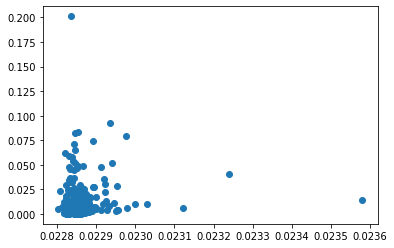

In [92]:
test_predictions = model.predict(yu_test)
plt.scatter(test_predictions, covid_test)

How well does the output of the NN correlate with the true incidence rate?

In [107]:
test_predictions = model.predict(yu_test)
print(pearsonr(test_predictions.flatten(), covid_test.numpy().flatten()))

(0.12077131217800789, 0.0032498393333730115)


In [102]:
test_predictions.flatten()

array([0.02287272, 0.02283898, 0.02286035, 0.02283075, 0.02284345,
       0.02285787, 0.02283353, 0.02285811, 0.02284619, 0.02284327,
       0.02284935, 0.02285308, 0.02286589, 0.02295339, 0.02285776,
       0.02283695, 0.0231216 , 0.02283999, 0.0228844 , 0.02284136,
       0.02284729, 0.02284485, 0.02283251, 0.0228461 , 0.02286407,
       0.02282202, 0.0228464 , 0.02282894, 0.02284026, 0.02291337,
       0.02285364, 0.02285179, 0.02284488, 0.02284533, 0.02282655,
       0.02286065, 0.02283752, 0.02283269, 0.02283829, 0.02284783,
       0.02282995, 0.02283373, 0.02285144, 0.02284583, 0.02284536,
       0.02283818, 0.02283213, 0.02283257, 0.02282727, 0.02285862,
       0.02284133, 0.02284801, 0.02284801, 0.02284184, 0.02283636,
       0.02283946, 0.02284339, 0.02283192, 0.02284265, 0.02284971,
       0.02286431, 0.02285406, 0.02294627, 0.02284381, 0.02283573,
       0.0228619 , 0.02283365, 0.02283618, 0.02285606, 0.02284411,
       0.02285445, 0.02284423, 0.02285933, 0.02284956, 0.02286